In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
# data frame all tracks with features from 1921-2020
df = pd.read_csv('data/music_with_genres.csv').drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(101656, 22)


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
0,0.511,['Elton John'],0.436,380667,0.429,0,0.000103,3,0.104,-10.884,1,My Father's Gun,29,1970-10-30,0.0319,119.025,0.223,1970,2AgMTn4RyRrI1uc3iXx4Xq,3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock', 'so...",False
1,0.465,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.235,-13.934,1,It Ain't Easy,26,1970-01-01,0.0337,76.848,0.347,1970,2hKxnhi2Eb3443AQbOnqNl,4FAEZeJcsYYBkNq2D3KGTV,"['album rock', 'art rock', 'blues rock', 'bril...",True
2,0.166,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.269,-10.204,0,I Should Be Proud,33,1970,0.1260,178.408,0.794,1970,2nxSAQBvF6gDIwZmG6B9nO,1Pe5hlKMCTULjosqZ6KanP,"['brill building pop', 'classic girl group', '...",True
3,0.990,['Vashti Bunyan'],0.600,141893,0.107,0,0.011400,0,0.101,-19.189,0,Where I Like To Stand,26,1970,0.0525,117.630,0.732,1970,2vNuzzaFEPY2WGdYFhdeui,4chuPfKtATDZvbRLExsTp2,"['anti-folk', 'british folk', 'folk', 'freak f...",False
4,0.639,['Ry Cooder'],0.568,134067,0.434,0,0.626000,7,0.229,-14.170,1,Available Space,35,1970-01-01,0.0379,147.388,0.694,1970,439kdOcVhEp5gQ67eYNkKG,1CPwHx5lgVxv0rfcp7UXLx,"['blues', 'blues rock', 'country blues', 'coun...",False


## Understanding the Features ##

Below, I do an exploration of certain features that are not as straight forward to understand either because of their value ranges or the feature itself.

In [3]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,101656.000000,101656.000000,1.016560e+05,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000
mean,0.296220,0.566567,2.435079e+05,0.605473,0.121331,0.095581,5.247433,0.201672,-9.387156,0.701041,45.229509,0.080092,120.629224,0.539649,1994.920015
std,0.305025,0.174132,1.014723e+05,0.240014,0.326513,0.240922,3.549025,0.181356,4.898656,0.457804,13.599671,0.093447,30.045454,0.258032,14.679558
min,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,0.029000,0.450000,1.915330e+05,0.441000,0.000000,0.000000,2.000000,0.092600,-11.846000,0.000000,35.000000,0.033800,97.013000,0.334000,1982.000000
50%,0.178000,0.576000,2.291480e+05,0.629000,0.000000,0.000049,5.000000,0.128000,-8.392000,1.000000,44.000000,0.044700,118.837000,0.547000,1995.000000
75%,0.517000,0.694000,2.753070e+05,0.802000,0.000000,0.009310,8.000000,0.255000,-5.893000,1.000000,55.000000,0.077600,139.935000,0.754000,2008.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.964000,244.091000,1.000000,2020.000000


In [4]:
# create temp df that contains only numerical features
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 
            'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']

temp = df[num_cols]

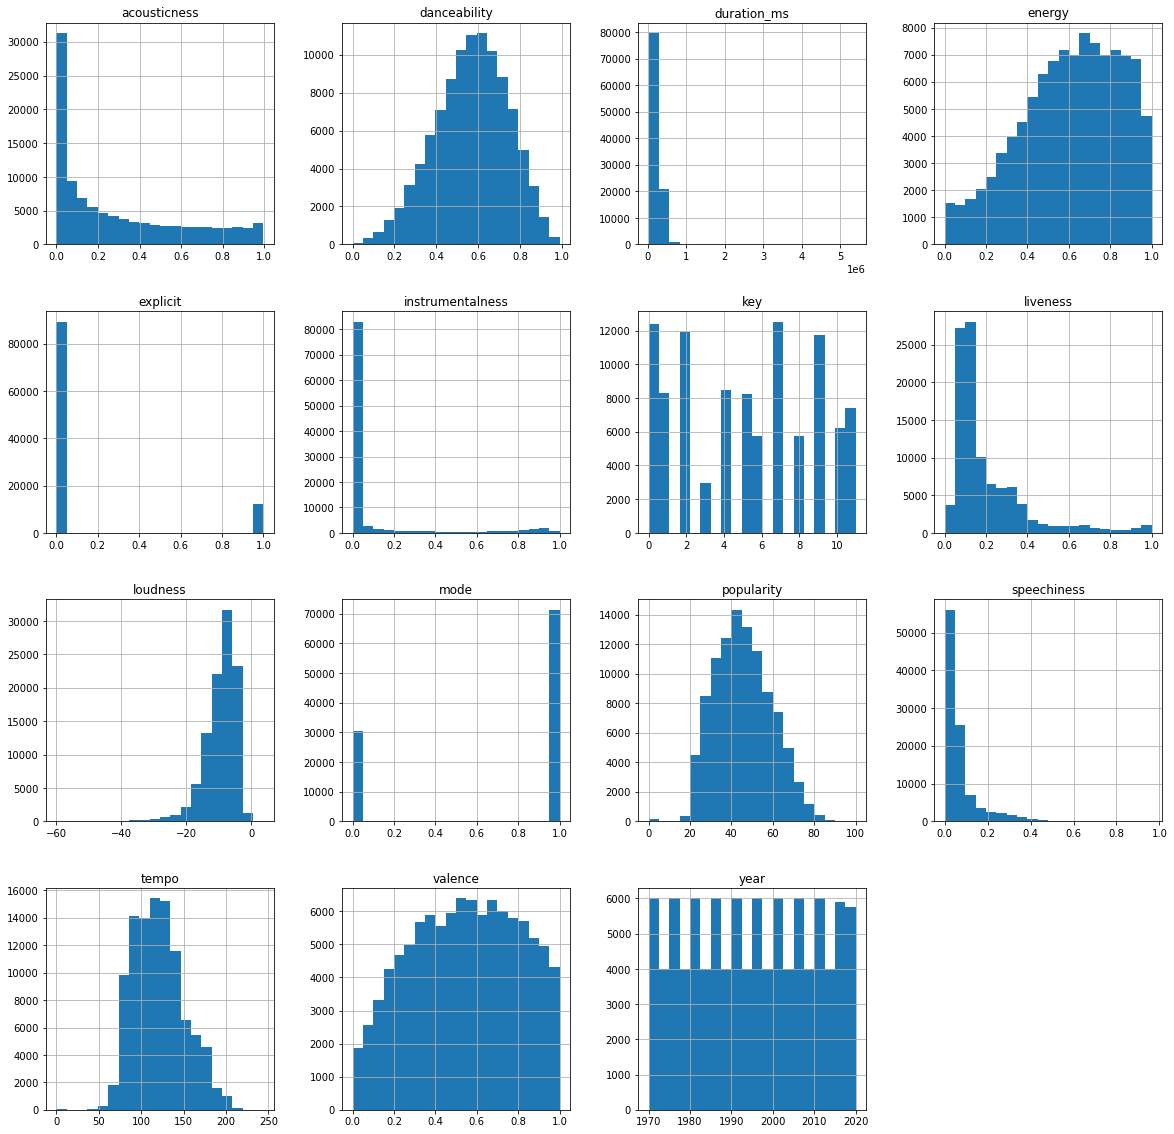

In [5]:
temp.hist(bins=20, figsize=(20,20));

### Loudness ###

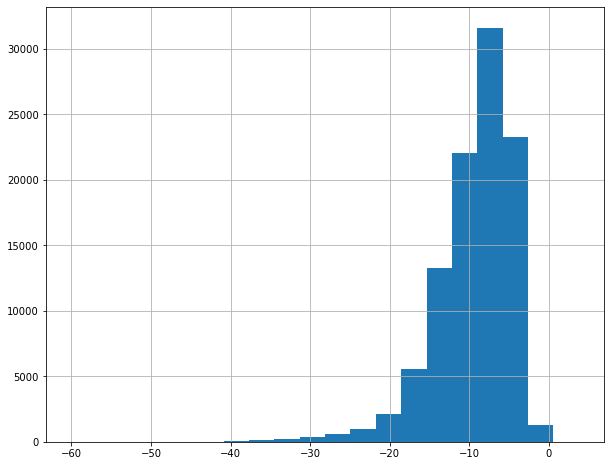

In [6]:
df.loudness.hist(bins=20, figsize=(10,8))

The typical range of values is between -60 to 0, acording to Spotify documentation. -60 is absolute silence and the track becomes louder the closer the value is to 0. 

In [7]:
df[df.loudness >= -2].artists.value_counts()[:20]

['Ramones']                   27
['Red Hot Chili Peppers']     18
['Eminem']                    17
['JAY-Z']                     10
['The Stooges']                8
['Slipknot']                   8
['50 Cent']                    7
['Zero Boys']                  6
['System Of A Down']           6
['Atmosphere']                 6
['Metallica']                  5
["Girls' Generation"]          5
['TWICE']                      5
['Three 6 Mafia']              4
['The Rolling Stones']         4
['The White Stripes']          4
['BTS']                        4
['Sergio Vega "El Shaka"']     4
['Britney Spears']             4
['Choking Victim']             4
Name: artists, dtype: int64

A number of outliers. Some tracks are very loud and and exceed -2 db. Interestingly, it is the same artists that produce these tracks. Ramones, Red Hot Chili Peppers, The Stooges, Slipknot, etc. all hover around the same genre. While, Eminem, JAY-Z, 50 Cent are similar in genre as well. Even though they are outliers it will be worth keeping them in the data as the loudness may be indicative of the genre.

In [8]:
df[df.loudness <= -40].artists.value_counts()

['Robert Schumann', 'Martha Argerich']                                                              3
['Binaural Beats Sleep']                                                                            2
['Baby Lullaby Academy']                                                                            2
['Ludwig van Beethoven', 'Louis Lortie']                                                            2
['John Williams']                                                                                   2
['Morton Feldman']                                                                                  1
['Gustav Holst', 'Berliner Philharmoniker', 'Herbert von Karajan', 'RIAS Kammerchor']               1
['Camille Saint-Saëns', 'The Monteverdi Choir', 'John Eliot Gardiner']                              1
['Noise Makers']                                                                                    1
['Ludwig van Beethoven', 'Daniel Barenboim']                                      

There are also a lot of quiet songs that are less that -40 db. These tend to be some classical music artists, lullabies, and music for going to sleep. Again, while they are outliears it can help with the clustering.

### Tempo ###

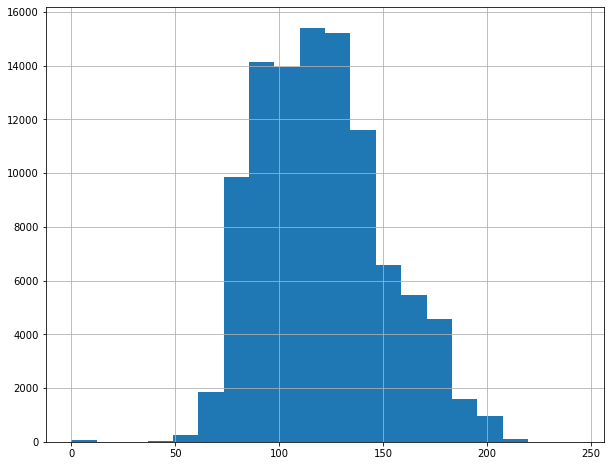

In [9]:
df.tempo.hist(bins=20, figsize=(10,8))

In [10]:
df.sort_values('tempo')

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
55568,0.944000,['Granular'],0.000,135484,0.000020,0,0.86900,2,0.1120,-40.449,0,White Noise - 145 hz,80,2017-10-13,0.0000,0.000,0.000,2017,6H4B9gJD6eQlNoEh8q85pP,1jfnMuDBl5OaAoU0VwLD8m,"['sleep', 'white noise']",False
10017,0.000904,['Sounds of Nature Noise'],0.000,179187,0.000139,0,0.83400,1,0.5390,-18.249,1,Soft Thunder,67,2019-10-03,0.0000,0.000,0.000,2019,62kBhPaUyrsGzmsaZJ35xh,1ZJbPwe4zKnUDRT7yi9dBC,['shush'],False
25617,0.346000,['José Alfredo Jimenez'],0.000,144760,0.305000,0,0.00000,11,0.4910,-13.098,1,Yo Debí Enamorarme de Tu Madre,28,1971-01-12,0.0000,0.000,0.000,1971,1MXN1vXXYndE2BHNgOaWj7,2T06whb4s6UiufL1j5Qtz9,"['bolero', 'grupera', 'mariachi', 'ranchera']",False
71579,0.912000,['Ernie'],0.000,148547,0.506000,0,0.00000,7,0.3100,-9.923,0,Rubber Duckie,33,1974-01-01,0.0000,0.000,0.000,1974,66avoTjnpc1Wv6AFX07mhm,1qkEx9YPevCOQhazUZK1bJ,"[""children's music""]",False
14506,0.119000,['Brown Noise'],0.000,570654,0.000020,0,0.42900,0,0.4670,-16.517,1,Brown Noise,50,2013-03-21,0.0000,0.000,0.000,2013,2LsevvtdFSKb8ztwOvQXf0,4H1DT9A2uoT7pTVRDSolnk,['white noise'],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27385,0.084100,['Suicide'],0.157,229840,0.500000,0,0.68800,6,0.2230,-14.337,0,Surrender - 2005 Remastered Version,30,1988-01-01,0.0464,224.437,0.359,1988,0XRX7qxRLh4HFvDqvD1hHV,6uVeWolwyRDrT84lLsaZyW,"['alternative rock', 'art rock', 'dance rock',...",False
61114,0.261000,['Grateful Dead'],0.332,373970,0.423000,0,0.00014,0,0.0716,-12.102,1,Candyman - 2013 Remaster,43,1970-06-01,0.0384,236.799,0.519,1970,4FJ0051ukEptZAhP01ExGV,4TMHGUX5WI7OOm53PqSDAT,"['classic rock', 'cosmic american', 'country r...",False
66343,0.196000,['J.J. Cale'],0.466,147200,0.188000,0,0.65700,1,0.0820,-18.309,0,Call The Doctor,48,1972,0.0547,243.372,0.615,1972,55ROr3cl3yi4YRBgfpDy1d,06nsZ3qSOYZ2hPVIMcr1IN,"['blues', 'blues rock', 'classic rock', 'count...",False
86747,0.497000,['Bill Withers'],0.535,277221,0.380000,0,0.25700,11,0.0720,-13.790,0,I Don't Want You on My Mind,36,1972-05-01,0.0497,243.507,0.828,1972,56n7xjncKs9RInEHAmjtco,1ThoqLcyIYvZn7iWbj8fsj,"['funk', 'motown', 'quiet storm', 'soul']",False


Some tracks have very low tempo. These are usually white noise tracks, silent tracks, or sounds of rain. Really high tempo songs tend to be rock songs , blues, etcs. Again, while these are outliers they are indicative of certain genres.

## Notable Correlations ##

In [11]:
# check which features have notable correlations
temp.corr()[(temp.corr() <= -0.3) | (temp.corr() >= 0.3)]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,NaN,NaN,-0.698513,NaN,NaN,NaN,NaN,-0.548065,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515564,NaN
duration_ms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,-0.698513,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.747830,NaN,NaN,NaN,NaN,0.320899,NaN
explicit,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.466648,NaN,NaN,0.330890
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.399432,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,-0.548065,NaN,NaN,0.747830,NaN,-0.399432,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.343870
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Some notable correlations/relationships:
- as the accousticness of a track increases, loudness decreases moderately and energy decreases strongly
- as danceability increases, valence tends to increases moderately
- as the energy of a track increases, the loudness of the track tends to increase strongly
- as energy of a track increases, valence increases somewhat
- as instrumentalness increases, loudness decreases somewhat
- there is a strong relationship between popularity and release year (newer songs tend to be more popular)
- there is moderate relationship between explicitness and speechiness of a track
- there is somewhat of a relationship between explicitness and release year of a track
- there is somewhat of a relationship between loudness and release year

This may be a sign of how the clusters will form.

# Initial Models #

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage

## Preprocessing ##

### All Tracks ###

In [13]:
# continuous numerical features
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                'popularity', 'speechiness', 'tempo', 'valence']

# cateogrical features
cat_features = ['explicit', 'key', 'mode', 'year']

# separate numerical features and categorical features for scaling, and set track_id as index
num_df = df.set_index('track_id')[num_features]
cat_df = df.set_index('track_id')[cat_features]

In [14]:
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = MinMaxScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df.index, columns=num_df.columns)
# merge scaled features with the categorical features
model_df = scaled_df.merge(cat_df, left_index=True, right_index=True)

In [15]:
model_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,explicit,key,mode,year
track_id,,,,,,,,,,,,,,,
2AgMTn4RyRrI1uc3iXx4Xq,0.513052,0.441296,0.067911,0.429,0.000103,0.1040,0.770520,0.29,0.033091,0.487626,0.223,0,3,1,1970
2hKxnhi2Eb3443AQbOnqNl,0.466867,0.636640,0.028207,0.376,0.000000,0.2350,0.722672,0.26,0.034959,0.314833,0.347,0,7,1,1970
2nxSAQBvF6gDIwZmG6B9nO,0.166667,0.422065,0.030037,0.753,0.000000,0.2690,0.781187,0.33,0.130705,0.730908,0.794,0,9,0,1970
2vNuzzaFEPY2WGdYFhdeui,0.993976,0.607287,0.023602,0.107,0.011400,0.1010,0.640233,0.26,0.054461,0.481910,0.732,0,0,0,1970
439kdOcVhEp5gQ67eYNkKG,0.641566,0.574899,0.022149,0.434,0.626000,0.2290,0.718970,0.35,0.039315,0.603824,0.694,0,7,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4KppkflX7I3vJQk7urOJaS,0.173695,0.885628,0.027667,0.443,0.000032,0.0891,0.824219,0.75,0.148340,0.409732,0.306,1,1,1,2020
1ehhGlTvjtHo2e4xJFB0SZ,0.016767,0.727733,0.028348,0.385,0.031300,0.1110,0.770159,0.64,0.041805,0.524395,0.270,0,8,1,2020
52eycxprLhK3lPcRLbQiVk,0.540161,0.520243,0.030803,0.539,0.002330,0.1080,0.794867,0.70,0.108921,0.506778,0.153,0,7,1,2020


Due to the limitations of my computer, I may have to reduce the amount of data I am working with. Below I use a subset of the data that only includes tracks that are potentially pop songs based on the genres associated with the track.

### Just Pop Tracks ###

In [16]:
# just use tracks that can potentially be pop songs
pop_df = df[df.is_pop == True]

In [17]:
# separate numerical vs categorical features
num_df2 = pop_df.set_index('track_id')[num_features]
cat_df2 = pop_df.set_index('track_id')[cat_features]
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = MinMaxScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df2)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df2.index, columns=num_df2.columns)
# merge scaled features with the categorical features
model_df_pop = scaled_df.merge(cat_df2, left_index=True, right_index=True)

In [18]:
model_df_pop

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,explicit,key,mode,year
track_id,,,,,,,,,,,,,,,
2hKxnhi2Eb3443AQbOnqNl,0.466867,0.613762,0.037676,0.376312,0.000000,0.228222,0.663935,0.26,0.012211,0.203983,0.349446,0,7,1,1970
2nxSAQBvF6gDIwZmG6B9nO,0.166666,0.384399,0.040401,0.753728,0.000000,0.262658,0.752781,0.33,0.110214,0.758629,0.799597,0,9,0,1970
5FD1IZKwXVSL3zGwlNvLoF,0.843373,0.502326,0.035378,0.501450,0.000000,0.130990,0.803182,0.39,0.015396,0.404401,0.767372,0,0,1,1970
5o5fCEeIGC8igGmbXQZL8Q,0.911646,0.680840,0.041082,0.157070,0.000007,0.081158,0.669247,0.36,0.026863,0.274958,0.380665,0,1,1,1970
6BZaceyM6nWzq0AUFcaEX1,0.911646,0.592124,0.032958,0.380316,0.001526,0.063940,0.745087,0.31,0.012848,0.382381,0.616314,0,5,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0j2CNrgtalXRGIvHMO2vzh,0.265059,0.738180,0.037990,0.702672,0.000000,0.111746,0.846843,0.66,0.282226,0.286104,0.340383,1,7,0,2020
5QZ11AHm7xiytOGXGlxQi5,0.022790,0.602943,0.045374,0.719691,0.000000,0.075183,0.897911,0.69,0.143130,0.254161,0.353474,1,0,1,2020
52eycxprLhK3lPcRLbQiVk,0.540160,0.489343,0.041541,0.539492,0.002339,0.099592,0.773551,0.70,0.087917,0.459854,0.154079,0,7,1,2020


## Initial Model: Hierarchical Clustering ##

Since the goal of clustering is to find different subgroups of pop, I believe the best algorithm to use is an hierarchical one since it will give me subclusters. Below we do this.

In [19]:
# construct dendogram in scipy, link with 'ward' linkage
Z = linkage(model_df_pop, method = 'ward')

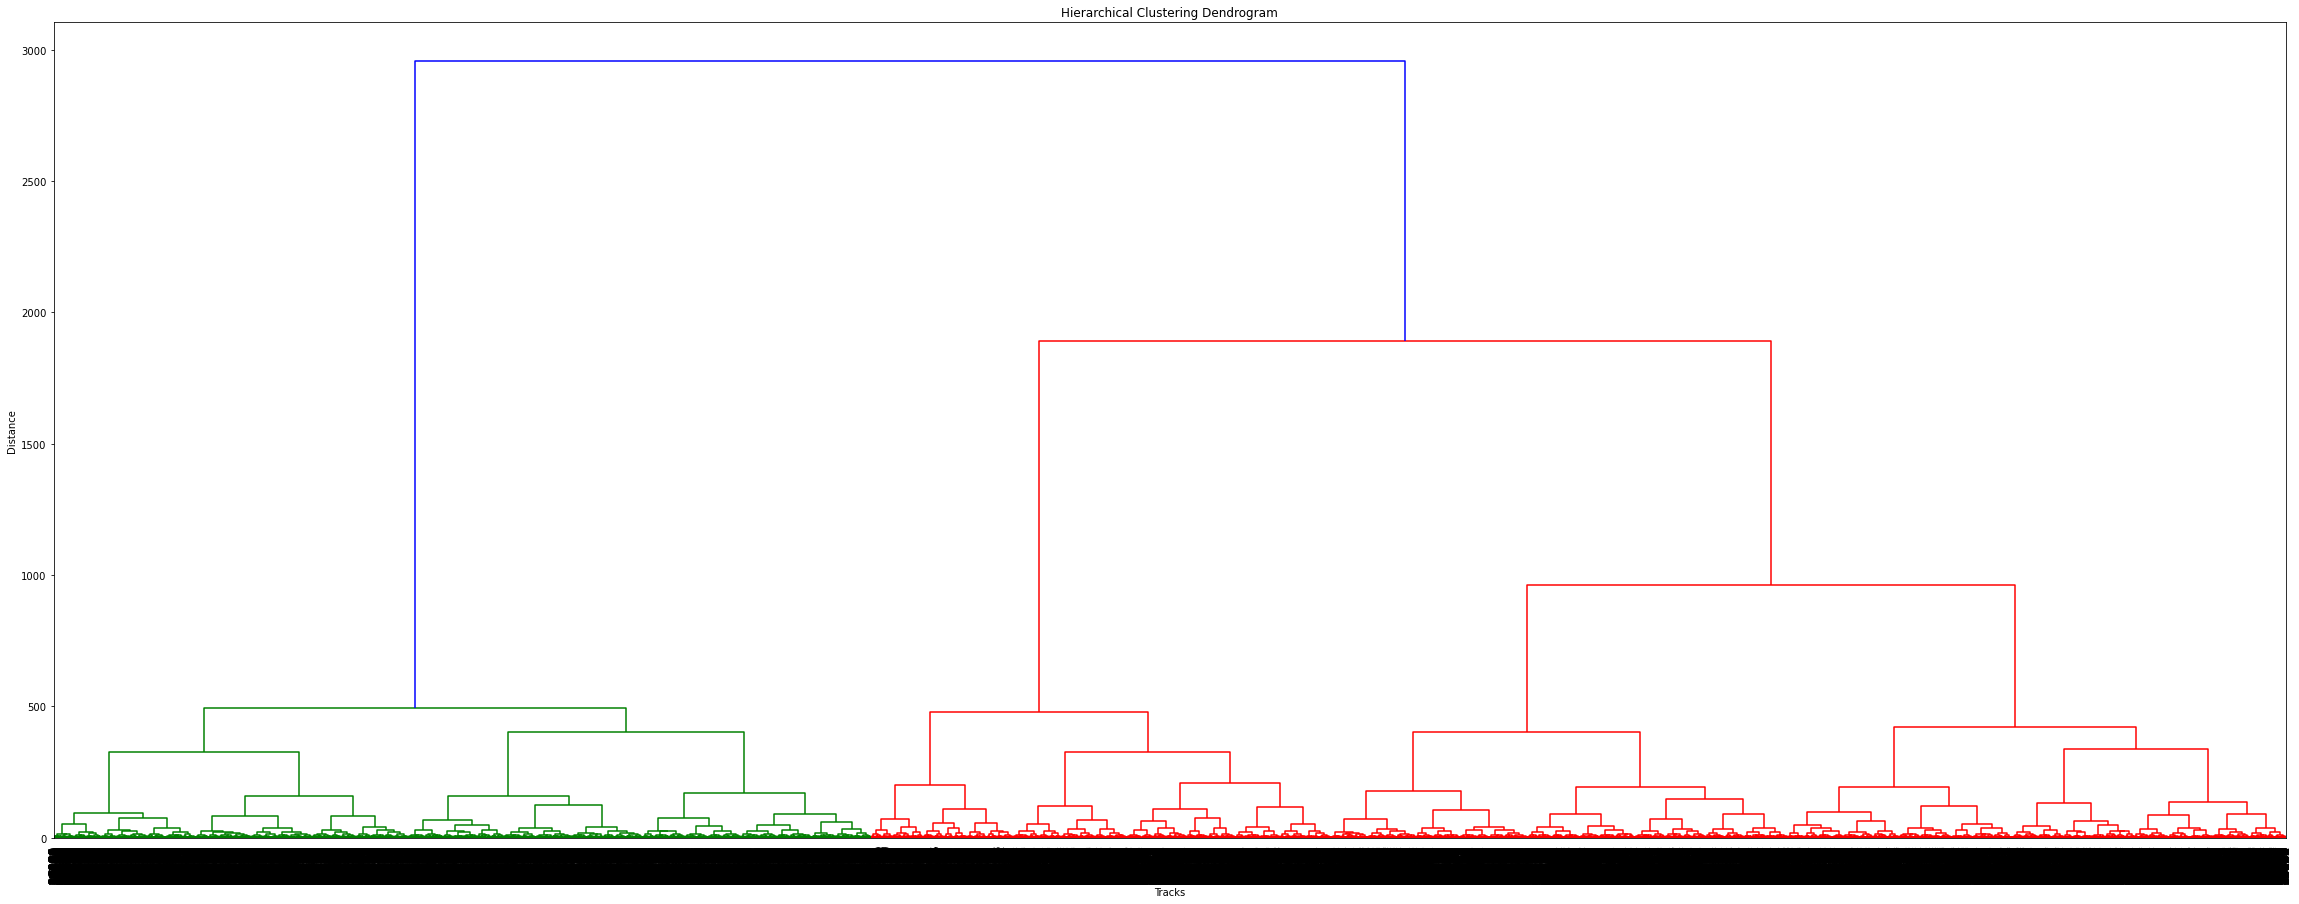

In [20]:
plt.figure(figsize=(40, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

From the dendogram above, there may be anywhere from 3-12 clusters to try out.

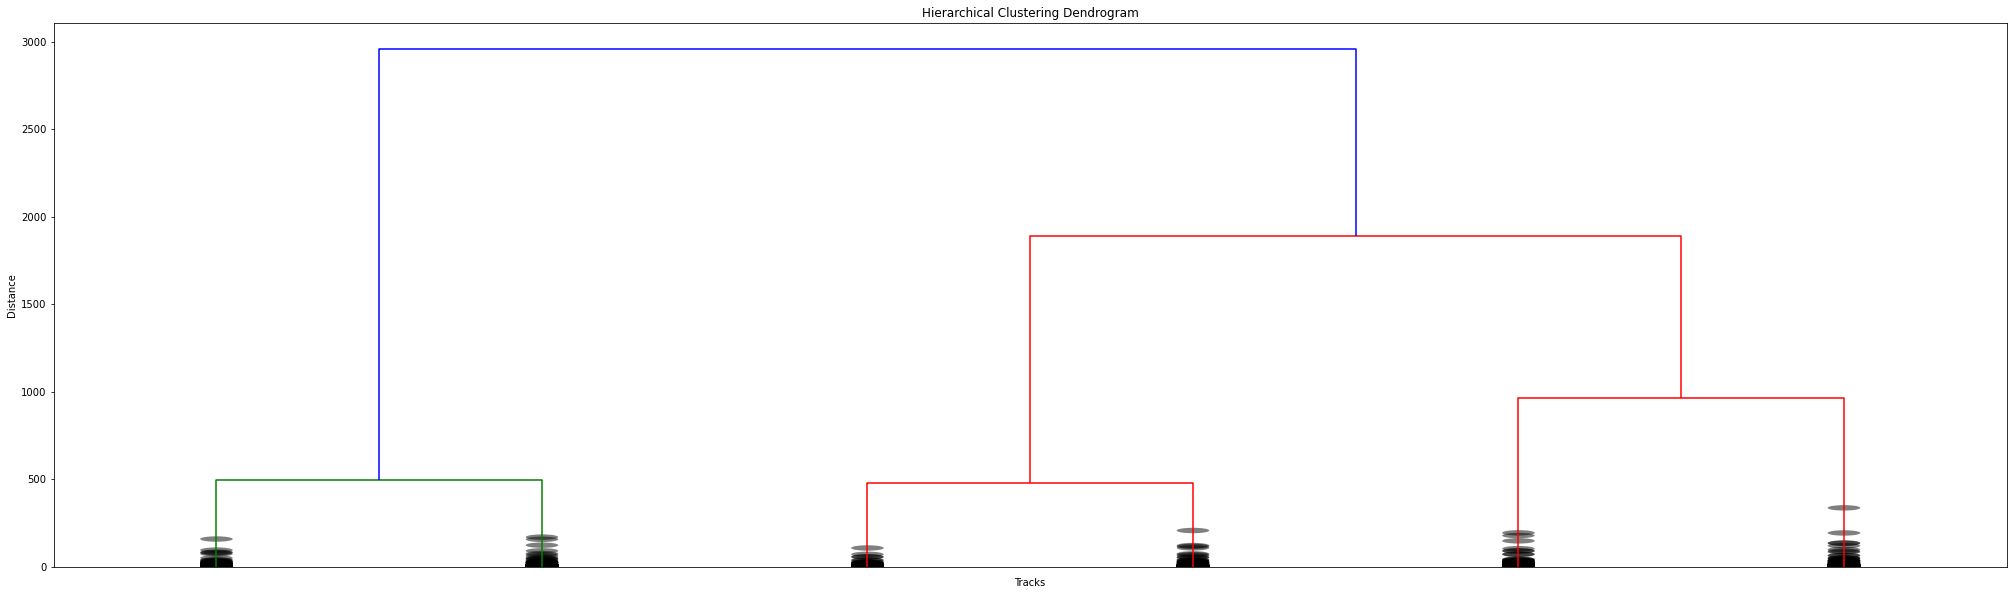

In [21]:
# truncated dendograme
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

In [22]:
# construct dendogram in scipy, link with 'complete' linkage
Y = linkage(model_df_pop, method = 'complete')

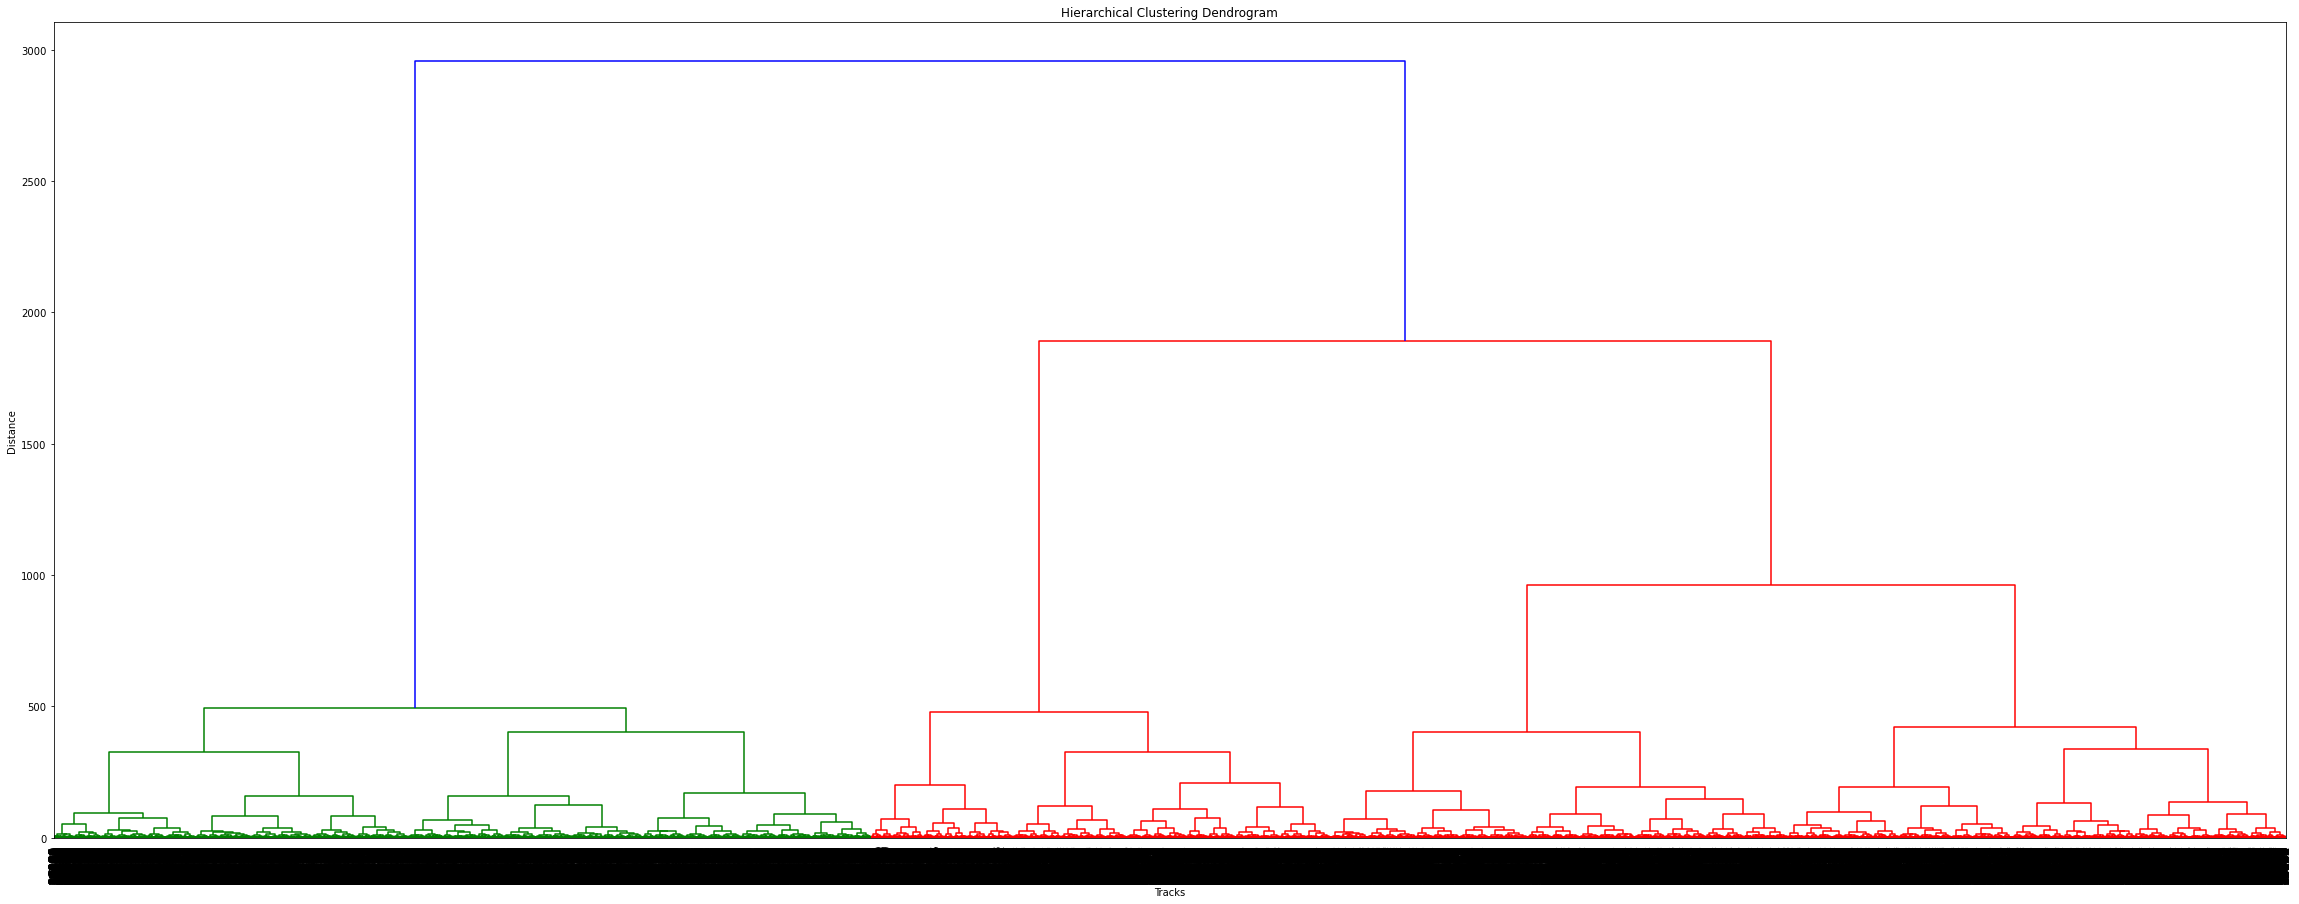

In [23]:
plt.figure(figsize=(40, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

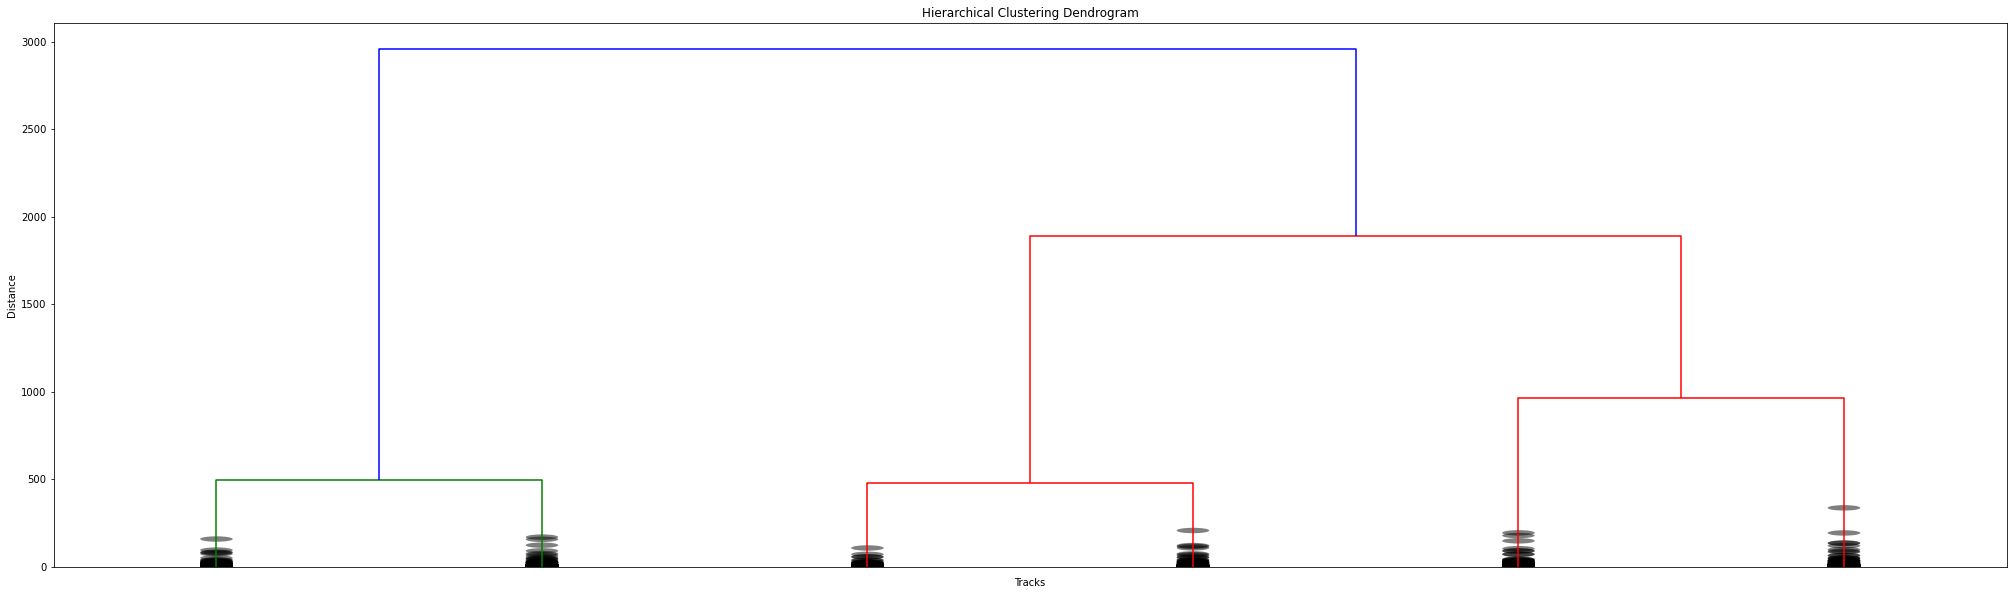

In [24]:
# truncated dendograme
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

Using different linkages resulted in pretty much the same dendogram. Below we'll redo this clustering using scikit-learn and try 5 and 6 clusters as the different stopping points and evaluate.

In [37]:
pop_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year', 'track_id', 'artist_id', 'genre', 'is_pop'],
      dtype='object')

In [35]:
pop_df.track_id

1         2hKxnhi2Eb3443AQbOnqNl
2         2nxSAQBvF6gDIwZmG6B9nO
18        5FD1IZKwXVSL3zGwlNvLoF
31        5o5fCEeIGC8igGmbXQZL8Q
40        6BZaceyM6nWzq0AUFcaEX1
                   ...          
101648    0j2CNrgtalXRGIvHMO2vzh
101649    5QZ11AHm7xiytOGXGlxQi5
101653    52eycxprLhK3lPcRLbQiVk
101654    3wYOGJYD31sLRmBgCvWxa4
101655    60RFlt48hm0l4Fu0JoccOl
Name: track_id, Length: 36451, dtype: object

### Agglomerative Clustering: 6 clusters ###

In [26]:
# instantiation model with 6 clusters and fit the model on data
cluster6 = AgglomerativeClustering(n_clusters=6).fit(model_df_pop)

In [42]:
# create dataframe to hold cluster info
cluster6_df = pd.DataFrame()
cluster6_df['track_id'] = pop_df.track_id
cluster6_df['name'] = pop_df.name
cluster6_df['artists'] = pop_df.artists
cluster6_df['genre'] = pop_df.genre
cluster6_df['cluster'] = cluster6.labels_

# distribution of clusters
print('Distribution of Clusters:')
print(cluster6_df.cluster.value_counts(normalize=True))

# print silhoette and variance ratio
print("Silhoette Score:", silhouette_score(model_df_pop, cluster6_df.cluster))

Distribution of Clusters:
0    0.222984
2    0.207484
1    0.204439
4    0.158926
3    0.143014
5    0.063153
Name: cluster, dtype: float64
Silhoette Score: 0.27681282822958675


The silhoette score isn't that great. At least it is positive and approaching 1. Maybe less cluster might be better.

### Agglomerative Clustering: 5 clusters ###

In [28]:
# instantiation model with 6 clusters and fit the model on data
cluster5 = AgglomerativeClustering(n_clusters=5).fit(model_df_pop)

In [77]:
# create dataframe to hold cluster info
cluster5_df = pd.DataFrame()
cluster5_df['track_id'] = pop_df.track_id
cluster5_df['name'] = pop_df.name
cluster5_df['artists'] = pop_df.artists
cluster5_df['genre'] = pop_df.genre
cluster5_df['cluster'] = cluster5.labels_

# distribution of clusters
print('Distribution of Clusters:')
print(cluster5_df.cluster.value_counts(normalize=True))

# print silhoette and variance ratio
print("Silhoette Score:", silhouette_score(model_df_pop, cluster5_df.cluster))

Distribution of Clusters:
1    0.222984
2    0.207484
0    0.206167
3    0.204439
4    0.158926
Name: cluster, dtype: float64
Silhoette Score: 0.3110766246467748


Less clusters did seem to result in a better silhoette score. Although it was not that big of an improvement. Let's analyze these priliminary results below.

### Prilimary Analysis ###

What are the top genres that make up each cluster? This way we can get a sense of what is being clustered together. 

In [78]:
cluster5_df.head()

,track_id,name,artists,genre,cluster
1,2hKxnhi2Eb3443AQbOnqNl,It Ain't Easy,['Three Dog Night'],"['album rock', 'art rock', 'blues rock', 'bril...",0
2,2nxSAQBvF6gDIwZmG6B9nO,I Should Be Proud,['Martha Reeves & The Vandellas'],"['brill building pop', 'classic girl group', '...",0
18,5FD1IZKwXVSL3zGwlNvLoF,Celoso,['Roberto Luti'],['pop romantico'],0
31,5o5fCEeIGC8igGmbXQZL8Q,Raindrops Keep Falling on My Head,['Dionne Warwick'],"['adult standards', 'brill building pop', 'dis...",0
40,6BZaceyM6nWzq0AUFcaEX1,Raindrops Keep Fallin' On My Head,['Johnny Mathis'],"['adult standards', 'brill building pop', 'eas...",0


In [79]:
cluster5_df.genre[1]

"['album rock', 'art rock', 'blues rock', 'brill building pop', 'bubblegum pop', 'classic rock', 'country rock', 'folk', 'folk rock', 'hard rock', 'heartland rock', 'mellow gold', 'rock', 'roots rock', 'soft rock']"

In [80]:
# remove quotes around list
import ast
cluster5_df.genre = cluster5_df.genre.apply(ast.literal_eval)

In [112]:
# what genres make up cluster 0?
cluster5_df[cluster5_df.cluster == 0].explode('genre').genre.value_counts(normalize=True)[:10]

mellow gold     0.049360
soft rock       0.048154
dance rock      0.042051
rock            0.040355
new wave pop    0.036771
folk rock       0.036491
art rock        0.035809
classic rock    0.032662
new wave        0.030826
album rock      0.029182
Name: genre, dtype: float64

In [113]:
# what genres make up cluster 1?
cluster5_df[cluster5_df.cluster == 1].explode('genre').genre.value_counts(normalize=True)[:10]

pop rock            0.040822
rock                0.031475
alternative rock    0.030297
new wave pop        0.028280
dance pop           0.025883
dance rock          0.025084
permanent wave      0.020870
new wave            0.020850
soft rock           0.019932
mellow gold         0.019193
Name: genre, dtype: float64

In [114]:
# what genres make up cluster 2?
cluster5_df[cluster5_df.cluster == 2].explode('genre').genre.value_counts(normalize=True)[:10]

pop              0.112333
pop rap          0.067863
rap              0.051263
dance pop        0.050288
post-teen pop    0.038744
hip hop          0.032683
trap             0.028022
modern rock      0.022387
indie pop        0.021230
electropop       0.019067
Name: genre, dtype: float64

In [117]:
# what genres make up cluster 3?
cluster5_df[cluster5_df.cluster == 3].explode('genre').genre.value_counts(normalize=True)[:10]

dance pop             0.043256
pop rock              0.035185
pop rap               0.034614
pop                   0.030543
pop punk              0.027687
hip hop               0.024973
rap                   0.024354
urban contemporary    0.022592
r&b                   0.021045
hip pop               0.019735
Name: genre, dtype: float64

In [124]:
# what genres make up cluster 4?
cluster5_df[cluster5_df.cluster == 4].explode('genre').genre.value_counts(normalize=True)[:10]

pop              0.072430
dance pop        0.055726
pop rap          0.047977
post-teen pop    0.035096
rap              0.032203
hip hop          0.029895
modern rock      0.024660
pop rock         0.022283
indie pop        0.021905
pop punk         0.020768
Name: genre, dtype: float64

We can start seeing some hints at groups that are forming. For instance Cluster 0 seems to be focused on softer rock. Maybe this hints at pop music that has a lot of guitar in it? Cluster 3 seems to be picking up on more 'urban' sounding pop maybe there is more singing spoken word involved. Unfortunately, as the silhoette score suggests, the clusters are not as distinct as we would like them to be which we could see by the overlap of different genres. However, this may not be the strongest analysis either since each track is associeted with multiple genres.

## Initial Model: KMeans Clustering ##

Next, we try some KMeans clustering to see if the clusters are more well-defined. 

In [190]:
v_ratios = []
inertias = []
for k in tqdm(range(2,13)):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=1031)
    
    # Fit model to samples and get labels
    cluster_labels = model.fit_predict(model_df_pop)

    # Append metrics to list
    v_ratios.append(calinski_harabasz_score(model_df_pop, cluster_labels))
    inertias.append(model.inertia_)

100%|██████████| 11/11 [00:08<00:00,  1.37it/s]


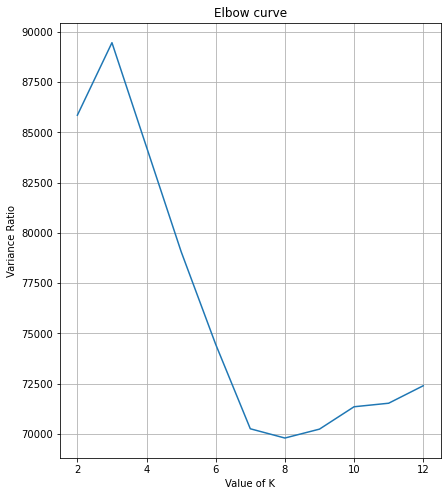

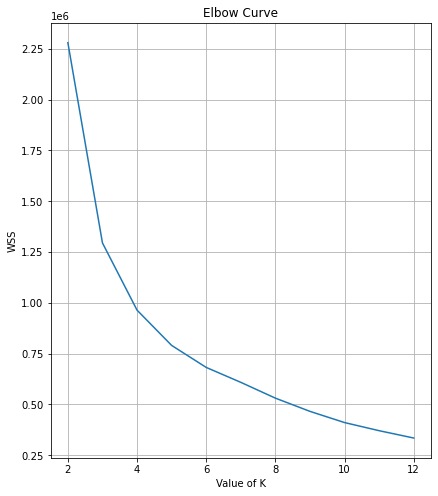

In [191]:
# plot variance ratio as function of k
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('Value of K')
plt.ylabel('Variance Ratio')
plt.plot(range(2, 13), v_ratios)
plt.grid(True)

# plot inertia as function of k
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow Curve')
plt.xlabel('Value of K')
plt.ylabel('WSS')
plt.plot(range(2, 13), inertias)
plt.grid(True)

Based on both the variance ratio and distortion, it seems that the ideal number of clusters is 3.

In [193]:
# get labels when k=3
model3 = KMeans(n_clusters=3, random_state=1031)
model3.fit(model_df_pop)
print(model3.labels_)
print(calinski_harabasz_score(model_df_pop, model3.labels_))

[2 2 2 ... 1 1 1]
89456.34031076907


In [194]:
# create data frame with labels attached 
model3_df = pd.DataFrame()
model3_df['track_id'] = pop_df.track_id
model3_df['name'] = pop_df.name
model3_df['artists'] = pop_df.artists
model3_df['genre'] = pop_df.genre
model3_df['cluster'] = model3.labels_

# distribution of clusters
print('Distribution of Clusters:')
print(model3_df.cluster.value_counts(normalize=True))

# print silhoette and variance ratio
print("Silhoette Score:", silhouette_score(model_df_pop, model3_df.cluster))

Distribution of Clusters:
1    0.395078
0    0.334367
2    0.270555
Name: cluster, dtype: float64
Silhoette Score: 0.4833079496080056


The silhoette score is much better than the previous two clustering attempts. Let's try to see the make up of each cluster.

### Analysis of KMeans Cluster ###

Let's see the distribution of genres in each cluster to get a sense of what each cluster is picking up on.

In [198]:
# remove unnecessay quotes from genre column
model3_df.genre = model3_df.genre.apply(ast.literal_eval)

In [217]:
# distribution of genres in the cluster 0
print(model3_df[model3_df.cluster == 0].explode('genre').genre.value_counts(normalize=True)[:10].values.sum())
model3_df[model3_df.cluster == 0].explode('genre').genre.value_counts(normalize=True)[:10]

0.25804677141809357


pop rock              0.040622
dance pop             0.036334
alternative rock      0.026489
pop rap               0.024345
rock                  0.024049
urban contemporary    0.022144
pop                   0.021721
hip hop               0.021270
r&b                   0.021101
hip pop               0.019972
Name: genre, dtype: float64

In [216]:
# distribution of genres in the cluster 1
print(model3_df[model3_df.cluster == 1].explode('genre').genre.value_counts(normalize=True)[:10].values.sum())
model3_df[model3_df.cluster == 1].explode('genre').genre.value_counts(normalize=True)[:10]

0.3911768191514577


pop              0.089669
pop rap          0.055923
dance pop        0.052575
rap              0.040235
post-teen pop    0.036057
hip hop          0.029998
modern rock      0.023421
trap             0.022310
indie pop        0.021628
pop rock         0.019362
Name: genre, dtype: float64

In [215]:
# distribution of genres in the cluster 2
print(model3_df[model3_df.cluster == 2].explode('genre').genre.value_counts(normalize=True)[:10].values.sum())
model3_df[model3_df.cluster == 2].explode('genre').genre.value_counts(normalize=True)[:10]

0.37197695681465087


soft rock       0.045729
mellow gold     0.045303
dance rock      0.044148
new wave pop    0.040339
rock            0.038731
art rock        0.034001
new wave        0.033657
folk rock       0.031897
classic rock    0.029436
new romantic    0.028735
Name: genre, dtype: float64